In [4]:
#importing required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2
import os

tf.random.set_seed(23)

In [5]:
#Reading directory of dataset
data_dir = 'D:/Data/LeafData'

In [6]:
#print all directories of dataset
print(os.listdir(data_dir))

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [80]:
#Convert directories of data to a dataframe
df = {"img_path":[],"class_names":[]}
for class_names in os.listdir(data_dir):
    for img_path in glob.glob(f"{data_dir}/{class_names}/*"):
        df["img_path"].append(img_path)
        df["class_names"].append(class_names)
df = pd.DataFrame(df)
   

In [81]:
df.shape

(4000, 2)

In [82]:
df.sample(5)

,img_path,class_names
485,D:/Data/LeafData/Anthracnose\IMG_20211011_1659...,Anthracnose
3013,D:/Data/LeafData/Powdery Mildew\20211109_12140...,Powdery Mildew
3808,D:/Data/LeafData/Sooty Mould\IMG_20211211_1542...,Sooty Mould
3933,D:/Data/LeafData/Sooty Mould\IMG_20211212_1444...,Sooty Mould
80,D:/Data/LeafData/Anthracnose\20211011_134413 (...,Anthracnose


In [10]:
#Divide the data into train,test and development 60% train, 20% test and 20% development
from sklearn.model_selection import train_test_split

train_size=0.6
# In the first step we will split the data in training and remaining dataset
train,rem = train_test_split(df, train_size=0.6)

test_size = 0.5
dev,test = train_test_split(rem, test_size=0.5)

print(train.count())
print(dev.count())
print(test.count())

img_path       2400
class_names    2400
dtype: int64
img_path       800
class_names    800
dtype: int64
img_path       800
class_names    800
dtype: int64


In [11]:
df['img_path'][0]

'D:/Data/LeafData/Anthracnose\\20211008_124249 (Custom).jpg'

In [12]:
#printing pixels of one image
img = cv2.imread(df.img_path[0])
print(img)

[[[221 201 183]
  [221 201 183]
  [220 200 182]
  ...
  [202 178 158]
  [202 178 158]
  [202 178 158]]

 [[221 201 183]
  [221 201 183]
  [220 200 182]
  ...
  [202 178 158]
  [202 178 158]
  [202 178 158]]

 [[221 201 183]
  [221 201 183]
  [220 200 182]
  ...
  [202 178 158]
  [202 178 158]
  [202 178 158]]

 ...

 [[208 188 171]
  [207 187 170]
  [207 187 170]
  ...
  [192 165 144]
  [192 165 144]
  [192 165 144]]

 [[208 188 171]
  [207 187 170]
  [207 187 170]
  ...
  [192 165 144]
  [192 165 144]
  [192 165 144]]

 [[208 188 171]
  [207 187 170]
  [207 187 170]
  ...
  [192 165 144]
  [192 165 144]
  [192 165 144]]]


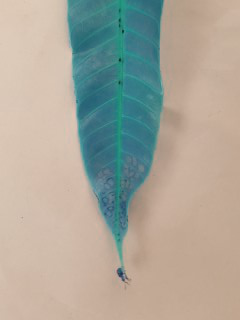

In [13]:
#visualizing an image
from PIL import Image
import numpy as np
from IPython.display import display

# define the shape of the image
height = 100
width = 100
channels = 3
pixel_values = cv2.imread(df.img_path[0])
image = Image.fromarray(pixel_values.astype('uint8'))
display(image)

In [14]:
#Label Encoding for classnames
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train["class_names"] = Le.fit_transform(train["class_names"])
test["class_names"] = Le.fit_transform(test["class_names"])
dev["class_names"] = Le.fit_transform(dev["class_names"])

In [15]:
train.sample(5)

,img_path,class_names
3479,D:/Data/LeafData/Powdery Mildew\IMG_20211107_1...,6
3520,D:/Data/LeafData/Sooty Mould\IMG_20211108_1209...,7
3545,D:/Data/LeafData/Sooty Mould\IMG_20211108_1215...,7
1447,D:/Data/LeafData/Cutting Weevil\20211011_16252...,2
320,D:/Data/LeafData/Anthracnose\IMG_20211011_1605...,0


In [16]:
dev.sample(5)

,img_path,class_names
630,D:/Data/LeafData/Bacterial Canker\IMG_20211106...,1
3619,D:/Data/LeafData/Sooty Mould\IMG_20211108_1223...,7
3483,D:/Data/LeafData/Powdery Mildew\IMG_20211107_1...,6
3986,D:/Data/LeafData/Sooty Mould\IMG_20211212_1503...,7
3298,D:/Data/LeafData/Powdery Mildew\IMG_20211107_1...,6


In [17]:
test.sample(5)

,img_path,class_names
1610,D:/Data/LeafData/Die Back\20211129_161616 (Cus...,3
3591,D:/Data/LeafData/Sooty Mould\IMG_20211108_1220...,7
2178,D:/Data/LeafData/Gall Midge\IMG_20211106_16284...,4
1675,D:/Data/LeafData/Die Back\20211129_162122 (Cus...,3
3080,D:/Data/LeafData/Powdery Mildew\20211109_12184...,6


In [18]:
#Assining required constants
batch_size = 64
epochs = 40
img_channel = 3
img_width, img_height = (48,48)

In [19]:
#One Hot encoding
train_labels = tf.keras.utils.to_categorical(train["class_names"])
dev_labels = tf.keras.utils.to_categorical(dev["class_names"])
test_labels = tf.keras.utils.to_categorical(test["class_names"])

In [20]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [21]:
dev_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
test_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
# Compute class weights 
classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.0231023, 1: 1.0544218, 2: 1.0, 3: 1.0801394, 4: 1.0231023, 5: 1.0508474, 6: 1.0, 7: 1.0402684}


In [25]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [26]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 96 
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [27]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of its CPU budget across all parameters
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [28]:
# Creating Train Dataset object and Verifying it
%time 
train_dataset = get_dataset(train["img_path"], train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
image , label = next(iter(train_dataset)) 
print(image.shape)
print(label.shape)

Wall time: 0 ns
(64, 96, 96, 3)
(64, 8)


Anthracnose


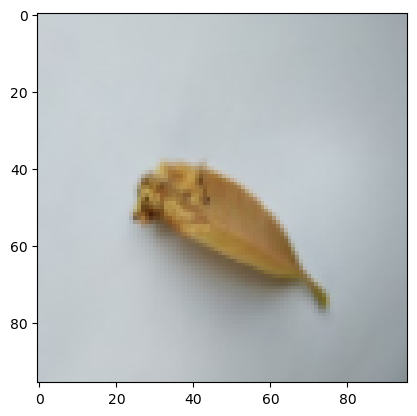

In [29]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [30]:
# Creating dev Dataset object and Verifying it
%time 
val_dataset = get_dataset(dev["img_path"] , dev_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

Wall time: 0 ns
(64, 96, 96, 3)
(64, 8)


Sooty Mould


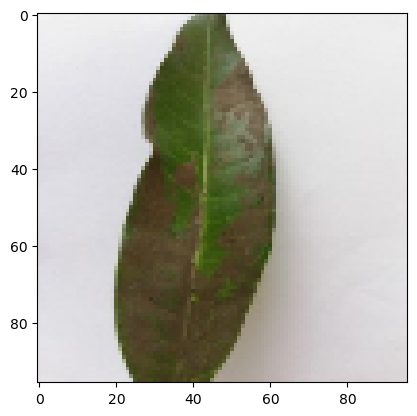

In [31]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [32]:
# Creating test Dataset object and Verifying it
%time 
test_dataset = get_dataset(test["img_path"] , test_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

Wall time: 0 ns
(64, 96, 96, 3)
(64, 8)


Healthy


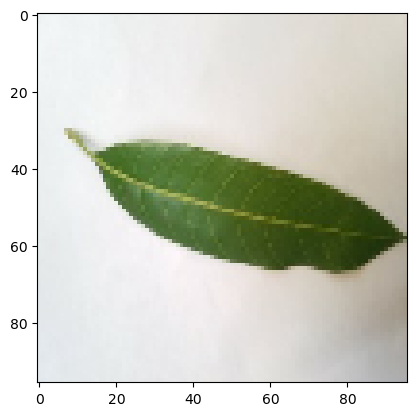

In [33]:
# View a sample Test Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [37]:
# Building EfficientNet model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model1 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d_2   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                      

In [38]:
# Compiling the model by providing the Optimizer , Loss and Metrics
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [39]:
# Train the model
history1 = model1.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 212s 5s/step - loss: 0.1395 - accuracy: 0.8239 - precision: 0.7677 - recall: 0.7800 - val_loss: 0.1876 - val_accuracy: 0.8880 - val_precision: 0.9082 - val_recall: 0.8633
Epoch 2/12
37/37 [==============================] - 180s 5s/step - loss: 0.0469 - accuracy: 0.9525 - precision: 0.9556 - recall: 0.9401 - val_loss: 0.0807 - val_accuracy: 0.9466 - val_precision: 0.9536 - val_recall: 0.9375
Epoch 3/12
37/37 [==============================] - 171s 5s/step - loss: 0.0285 - accuracy: 0.9735 - precision: 0.9720 - recall: 0.9658 - val_loss: 0.2488 - val_accuracy: 0.8763 - val_precision: 0.8883 - val_recall: 0.8698
Epoch 4/12
37/37 [==============================] - 191s 5s/step - loss: 0.0317 - accuracy: 0.9666 - precision: 0.9660 - recall: 0.9602 - val_loss: 0.0464 - val_accuracy: 0.9531 - val_precision: 0.9667 - val_recall: 0.9440
Epoch 5/12
37/37 [==============================] - 198s 5s/step - loss: 0.0161 - accuracy: 0.9850 - precisi

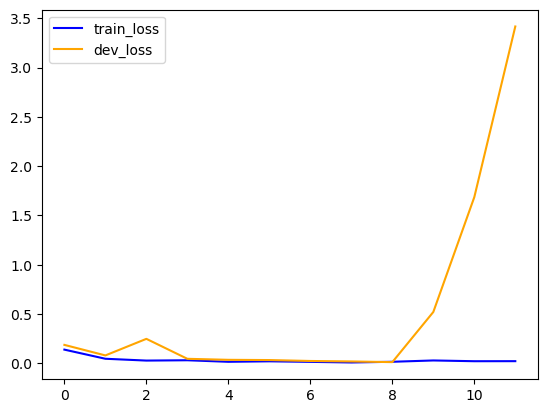

In [42]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],color='blue',label='train_loss')
plt.plot(history1.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

In [43]:
#Second model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model2 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 256)         3244288   
                                                                 
 global_average_pooling2d_3   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 2056      
                                                      

In [44]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [45]:
history2 = model2.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 206s 5s/step - loss: 0.1224 - accuracy: 0.8425 - precision: 0.8121 - recall: 0.7960 - val_loss: 0.2072 - val_accuracy: 0.8659 - val_precision: 0.8705 - val_recall: 0.8581
Epoch 2/12
37/37 [==============================] - 181s 5s/step - loss: 0.0569 - accuracy: 0.9461 - precision: 0.9448 - recall: 0.9371 - val_loss: 0.2073 - val_accuracy: 0.8294 - val_precision: 0.8954 - val_recall: 0.7799
Epoch 3/12
37/37 [==============================] - 185s 5s/step - loss: 0.0237 - accuracy: 0.9786 - precision: 0.9764 - recall: 0.9726 - val_loss: 0.0361 - val_accuracy: 0.9596 - val_precision: 0.9667 - val_recall: 0.9440
Epoch 4/12
37/37 [==============================] - 199s 5s/step - loss: 0.0187 - accuracy: 0.9824 - precision: 0.9836 - recall: 0.9782 - val_loss: 0.0274 - val_accuracy: 0.9727 - val_precision: 0.9726 - val_recall: 0.9714
Epoch 5/12
37/37 [==============================] - 207s 6s/step - loss: 0.0142 - accuracy: 0.9846 - precisi

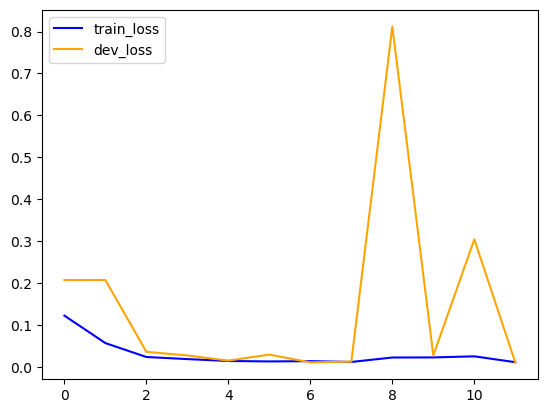

In [46]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'],color='blue',label='train_loss')
plt.plot(history2.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

In [47]:
#Third model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model3 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 4, padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D((3,3)),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 256)         5767424   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 256)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                      

In [48]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [49]:
history3 = model3.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 238s 6s/step - loss: 0.1360 - accuracy: 0.8353 - precision: 0.7741 - recall: 0.7990 - val_loss: 0.2306 - val_accuracy: 0.8529 - val_precision: 0.8589 - val_recall: 0.8398
Epoch 2/12
37/37 [==============================] - 206s 6s/step - loss: 0.0365 - accuracy: 0.9645 - precision: 0.9614 - recall: 0.9589 - val_loss: 0.0760 - val_accuracy: 0.9323 - val_precision: 0.9441 - val_recall: 0.9232
Epoch 3/12
37/37 [==============================] - 197s 5s/step - loss: 0.0332 - accuracy: 0.9688 - precision: 0.9714 - recall: 0.9589 - val_loss: 0.0782 - val_accuracy: 0.9310 - val_precision: 0.9367 - val_recall: 0.9245
Epoch 4/12
37/37 [==============================] - 204s 6s/step - loss: 0.0280 - accuracy: 0.9739 - precision: 0.9671 - recall: 0.9700 - val_loss: 0.0860 - val_accuracy: 0.9310 - val_precision: 0.9363 - val_recall: 0.9180
Epoch 5/12
37/37 [==============================] - 198s 5s/step - loss: 0.0249 - accuracy: 0.9726 - precisi

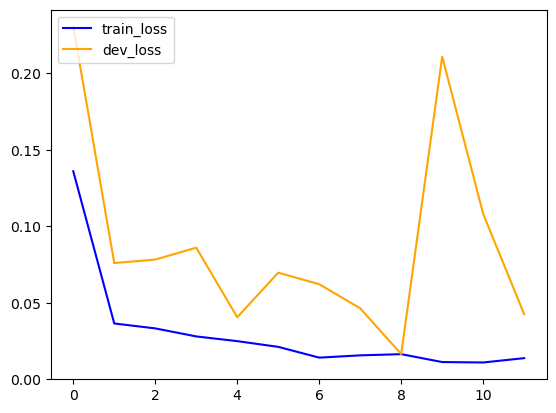

In [50]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'],color='blue',label='train_loss')
plt.plot(history3.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

In [51]:
#Fourth model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model4 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), padding='same'),
    tf.keras.layers.Conv2D(256, 4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model4.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 256)         5767424   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 256)         1048832   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [52]:
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [53]:
history4 = model4.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10
37/37 [==============================] - 244s 6s/step - loss: 0.2097 - accuracy: 0.7272 - precision: 0.7650 - recall: 0.6655 - val_loss: 1.0106 - val_accuracy: 0.1445 - val_precision: 0.1342 - val_recall: 0.0898
Epoch 2/10
37/37 [==============================] - 1103s 31s/step - loss: 0.0963 - accuracy: 0.8985 - precision: 0.9183 - recall: 0.8754 - val_loss: 16.3941 - val_accuracy: 0.2617 - val_precision: 0.2703 - val_recall: 0.2383
Epoch 3/10
37/37 [==============================] - 221s 6s/step - loss: 0.0810 - accuracy: 0.9204 - precision: 0.9366 - recall: 0.8981 - val_loss: 14.0574 - val_accuracy: 0.1667 - val_precision: 0.1688 - val_recall: 0.1849
Epoch 4/10
37/37 [==============================] - 219s 6s/step - loss: 0.0606 - accuracy: 0.9422 - precision: 0.9506 - recall: 0.9302 - val_loss: 7.9841 - val_accuracy: 0.5560 - val_precision: 0.6127 - val_recall: 0.5169
Epoch 5/10
37/37 [==============================] - 212s 6s/step - loss: 0.0468 - accuracy: 0.9521 - pre

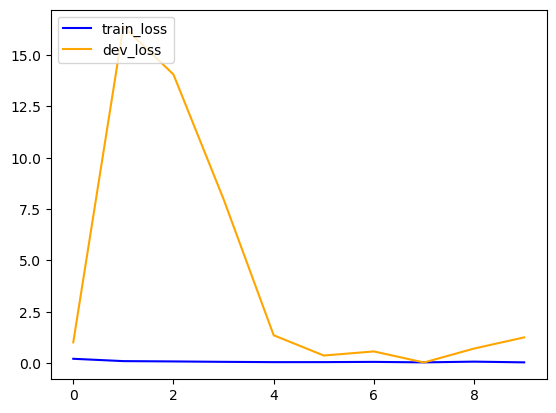

In [54]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'],color='blue',label='train_loss')
plt.plot(history4.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

In [55]:
#Now we apply the second model on the test data
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model_test = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model_test.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 256)         3244288   
                                                                 
 global_average_pooling2d_4   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 8)                 2056      
                                                      

In [56]:
model_test.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [57]:
history_test = model_test.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=test_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 227s 5s/step - loss: 0.1220 - accuracy: 0.8539 - precision: 0.8302 - recall: 0.8074 - val_loss: 0.0945 - val_accuracy: 0.8906 - val_precision: 0.9065 - val_recall: 0.8581
Epoch 2/12
37/37 [==============================] - 191s 5s/step - loss: 0.0375 - accuracy: 0.9619 - precision: 0.9638 - recall: 0.9576 - val_loss: 0.1501 - val_accuracy: 0.9336 - val_precision: 0.9409 - val_recall: 0.9336
Epoch 3/12
37/37 [==============================] - 208s 6s/step - loss: 0.0259 - accuracy: 0.9713 - precision: 0.9716 - recall: 0.9666 - val_loss: 0.0273 - val_accuracy: 0.9688 - val_precision: 0.9737 - val_recall: 0.9648
Epoch 4/12
37/37 [==============================] - 197s 5s/step - loss: 0.0247 - accuracy: 0.9730 - precision: 0.9741 - recall: 0.9658 - val_loss: 0.0824 - val_accuracy: 0.9544 - val_precision: 0.9557 - val_recall: 0.9544
Epoch 5/12
37/37 [==============================] - 191s 5s/step - loss: 0.0123 - accuracy: 0.9880 - precisi

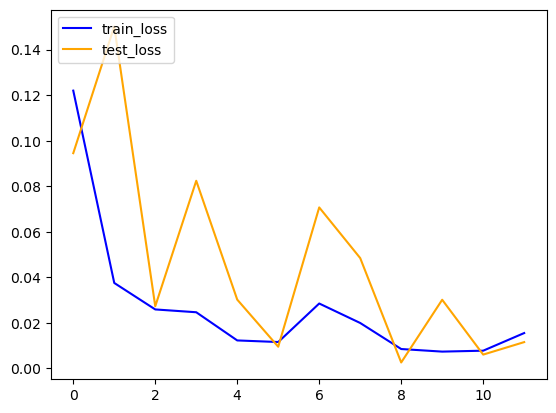

In [59]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history_test.history['loss'],color='blue',label='train_loss')
plt.plot(history_test.history['val_loss'],color='orange',label='test_loss')
plt.legend(loc='upper left')
plt.show()

In [83]:
df

,img_path,class_names
0,D:/Data/LeafData/Anthracnose\20211008_124249 (...,Anthracnose
1,D:/Data/LeafData/Anthracnose\20211008_124250 (...,Anthracnose
2,D:/Data/LeafData/Anthracnose\20211008_124252 (...,Anthracnose
3,D:/Data/LeafData/Anthracnose\20211008_124253 (...,Anthracnose
4,D:/Data/LeafData/Anthracnose\20211008_124256 (...,Anthracnose
...,...,...
3995,D:/Data/LeafData/Sooty Mould\IMG_20211212_1504...,Sooty Mould
3996,D:/Data/LeafData/Sooty Mould\IMG_20211212_1504...,Sooty Mould
3997,D:/Data/LeafData/Sooty Mould\IMG_20211212_1505...,Sooty Mould
3998,D:/Data/LeafData/Sooty Mould\IMG_20211212_1505...,Sooty Mould


In [84]:
#Convert the image path to pixels
df['img_data'] = [cv2.imread(img_path) for img_path in df['img_path']]

In [85]:
df.head()

,img_path,class_names,img_data
0,D:/Data/LeafData/Anthracnose\20211008_124249 (...,Anthracnose,"[[[221, 201, 183], [221, 201, 183], [220, 200,..."
1,D:/Data/LeafData/Anthracnose\20211008_124250 (...,Anthracnose,"[[[229, 214, 205], [229, 214, 205], [229, 214,..."
2,D:/Data/LeafData/Anthracnose\20211008_124252 (...,Anthracnose,"[[[218, 205, 197], [219, 206, 198], [220, 207,..."
3,D:/Data/LeafData/Anthracnose\20211008_124253 (...,Anthracnose,"[[[223, 210, 202], [223, 210, 202], [222, 209,..."
4,D:/Data/LeafData/Anthracnose\20211008_124256 (...,Anthracnose,"[[[227, 207, 189], [227, 207, 189], [227, 207,..."


In [86]:
df['img_data'][0]

array([[[221, 201, 183],
        [221, 201, 183],
        [220, 200, 182],
        ...,
        [202, 178, 158],
        [202, 178, 158],
        [202, 178, 158]],

       [[221, 201, 183],
        [221, 201, 183],
        [220, 200, 182],
        ...,
        [202, 178, 158],
        [202, 178, 158],
        [202, 178, 158]],

       [[221, 201, 183],
        [221, 201, 183],
        [220, 200, 182],
        ...,
        [202, 178, 158],
        [202, 178, 158],
        [202, 178, 158]],

       ...,

       [[208, 188, 171],
        [207, 187, 170],
        [207, 187, 170],
        ...,
        [192, 165, 144],
        [192, 165, 144],
        [192, 165, 144]],

       [[208, 188, 171],
        [207, 187, 170],
        [207, 187, 170],
        ...,
        [192, 165, 144],
        [192, 165, 144],
        [192, 165, 144]],

       [[208, 188, 171],
        [207, 187, 170],
        [207, 187, 170],
        ...,
        [192, 165, 144],
        [192, 165, 144],
        [192, 165, 144]]

In [90]:
from skimage.transform import resize

img_data_flat = np.array([resize(img, (100, 100)).flatten() for img in df['img_data']])
print(img_data_flat)

[[0.86605349 0.78762212 0.71703388 ... 0.75296407 0.64708172 0.56472878]
 [0.89806549 0.83924215 0.80394746 ... 0.7529774  0.65493819 0.57650681]
 [0.86294945 0.81196906 0.78059651 ... 0.6705936  0.56471125 0.48627988]
 ...
 [0.9999893  0.99514603 0.99514603 ... 0.81290373 0.78937432 0.80898216]
 [0.99747533 0.99747533 0.99747533 ... 0.82190422 0.79837481 0.81798266]
 [0.97946655 0.97162342 0.97162342 ... 0.81547634 0.79979007 0.81939791]]


In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(img_data_flat, df['class_names'])
accuracy = neigh.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.8535


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [92]:
neigh1 = KNeighborsClassifier(n_neighbors=5)
neigh1.fit(img_data_flat, df['class_names'])
accuracy = neigh1.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.78725


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [94]:
neigh2 = KNeighborsClassifier(n_neighbors=7)
neigh2.fit(img_data_flat, df['class_names'])
accuracy = neigh2.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.76425


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [96]:
neigh3 = KNeighborsClassifier(n_neighbors=9)
neigh3.fit(img_data_flat, df['class_names'])
accuracy = neigh3.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.73525


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [97]:
neigh4 = KNeighborsClassifier(n_neighbors=11)
neigh4.fit(img_data_flat, df['class_names'])
accuracy = neigh4.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.725


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [98]:
neigh5 = KNeighborsClassifier(n_neighbors=13)
neigh5.fit(img_data_flat, df['class_names'])
accuracy = neigh5.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.71025


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
neigh6 = KNeighborsClassifier(n_neighbors=15)
neigh6.fit(img_data_flat, df['class_names'])
accuracy = neigh6.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.7005


C:\Users\S Sai Manideep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


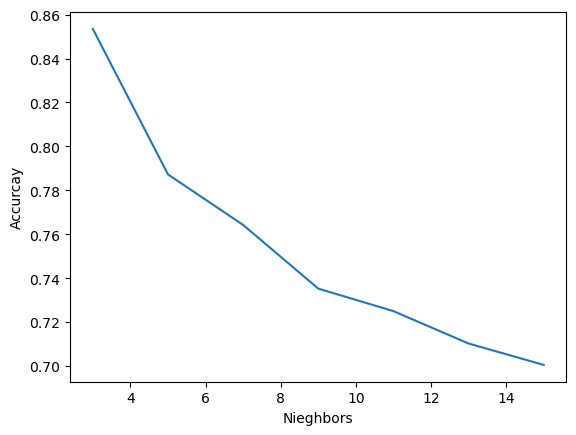

In [101]:
#Plot a graph for neighbors vs accuracy
x=[3,5,7,9,11,13,15]
y=[0.8535,0.78725,0.76425,0.73525,0.725,0.71025,0.7005]
plt.xlabel("Nieghbors")
plt.ylabel("Accurcay")
plt.plot(x,y)